## Importing Necessary Libraries

In [1]:
# !pip install matplotlib

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Importing data

In [3]:
data = pd.read_csv('laptop_data.csv')
data.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [4]:
data['TypeName'].value_counts()

TypeName
Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    121
Workstation            29
Netbook                25
Name: count, dtype: int64

In [5]:
data['Company'].value_counts()

Company
Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: count, dtype: int64

In [6]:
data['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x14

In [7]:
data.columns

Index(['Unnamed: 0', 'Company', 'TypeName', 'Inches', 'ScreenResolution',
       'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

In [8]:
# removing the unnamed: 0 col

data = data.iloc[:,1:]
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


## Checking Null values

In [9]:
data.isnull().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [10]:
# checking for duplicated rows

data.duplicated().sum()

29

In [11]:
data.drop_duplicates(inplace=True)

In [12]:
data.duplicated().sum()

0

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1274 entries, 0 to 1273
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1274 non-null   object 
 1   TypeName          1274 non-null   object 
 2   Inches            1274 non-null   float64
 3   ScreenResolution  1274 non-null   object 
 4   Cpu               1274 non-null   object 
 5   Ram               1274 non-null   object 
 6   Memory            1274 non-null   object 
 7   Gpu               1274 non-null   object 
 8   OpSys             1274 non-null   object 
 9   Weight            1274 non-null   object 
 10  Price             1274 non-null   float64
dtypes: float64(2), object(9)
memory usage: 119.4+ KB


In [14]:

data['Ram'] = data['Ram'].str.replace('GB','')
data['Weight'] = data['Weight'].str.replace('kg','')

# converting from string->integer for ram column

data['Ram'] = data['Ram'].astype('int32')

# converting from string-> float for the weight column

data['Weight'] = data['Weight'].astype('float32')

data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1274 entries, 0 to 1273
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1274 non-null   object 
 1   TypeName          1274 non-null   object 
 2   Inches            1274 non-null   float64
 3   ScreenResolution  1274 non-null   object 
 4   Cpu               1274 non-null   object 
 5   Ram               1274 non-null   int32  
 6   Memory            1274 non-null   object 
 7   Gpu               1274 non-null   object 
 8   OpSys             1274 non-null   object 
 9   Weight            1274 non-null   float32
 10  Price             1274 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 109.5+ KB


# Exploratory Data Analysis

In [16]:
data.describe()

,Inches,Ram,Weight,Price
count,1274.000000,1274.000000,1274.000000,1274.000000
mean,15.022449,8.444270,2.040401,60503.185074
std,1.429940,5.098291,0.669444,37333.222977
min,10.100000,2.000000,0.690000,9270.720000
25%,14.000000,4.000000,1.500000,32495.605200
50%,15.600000,8.000000,2.040000,52693.920000
75%,15.600000,8.000000,2.310000,79773.480000
max,18.400000,64.000000,4.700000,324954.720000


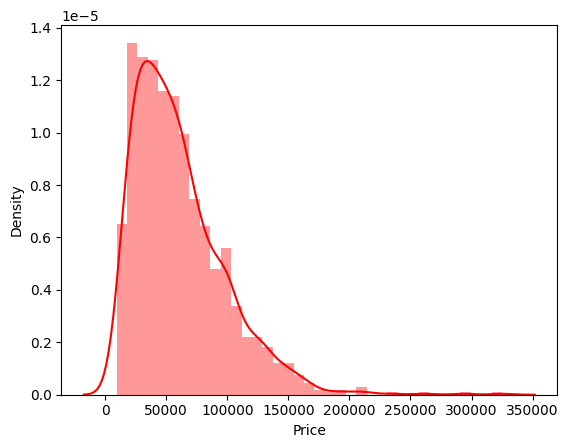

In [17]:
# viewing the distribution of the price column
import warnings
warnings.filterwarnings('ignore')
# plt.figure(figsize=(10,5))
sns.distplot(data['Price'],color='red')
plt.show()

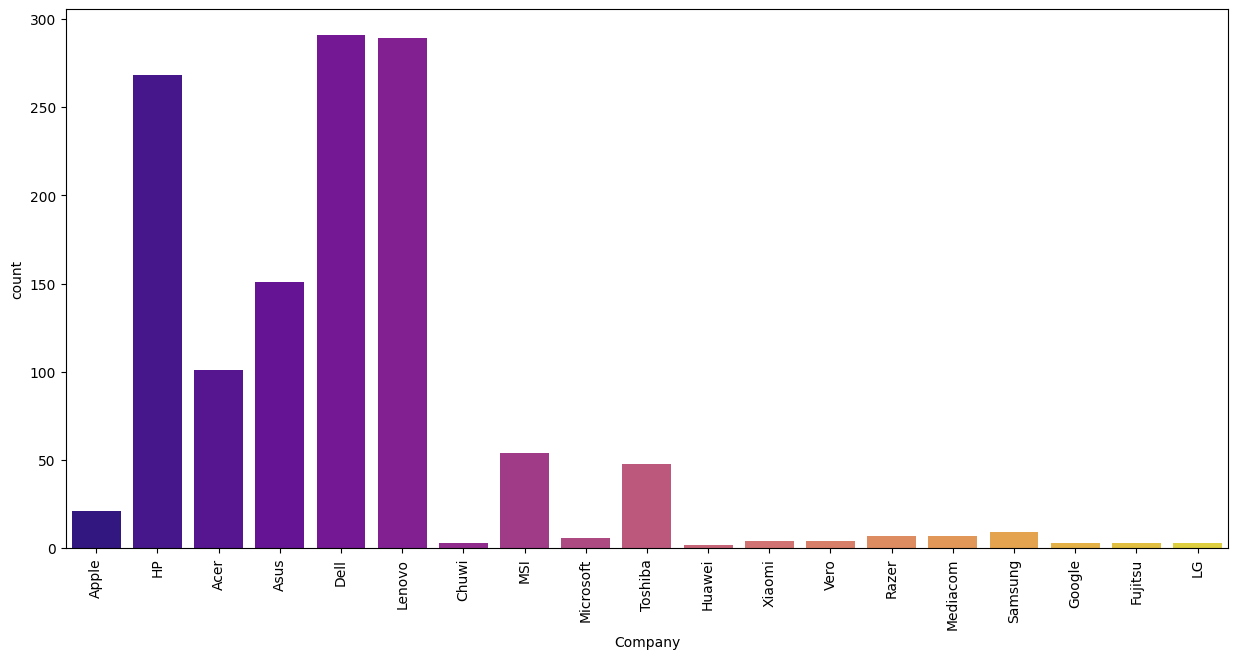

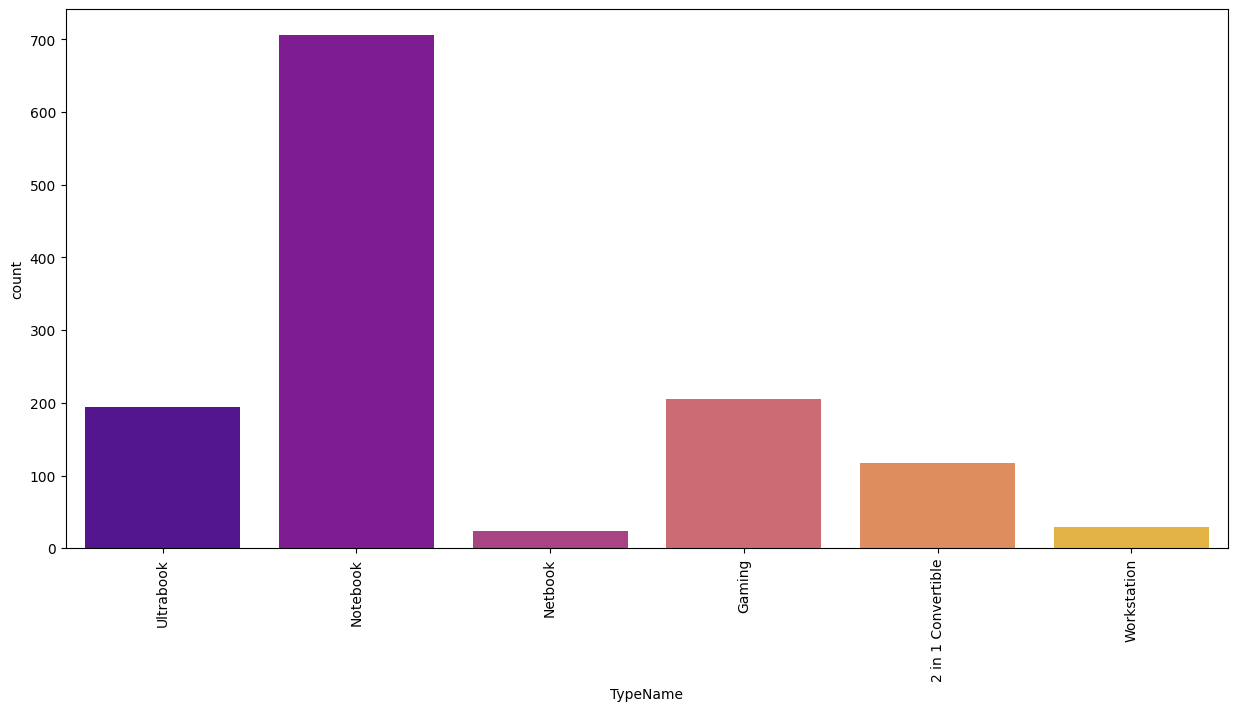

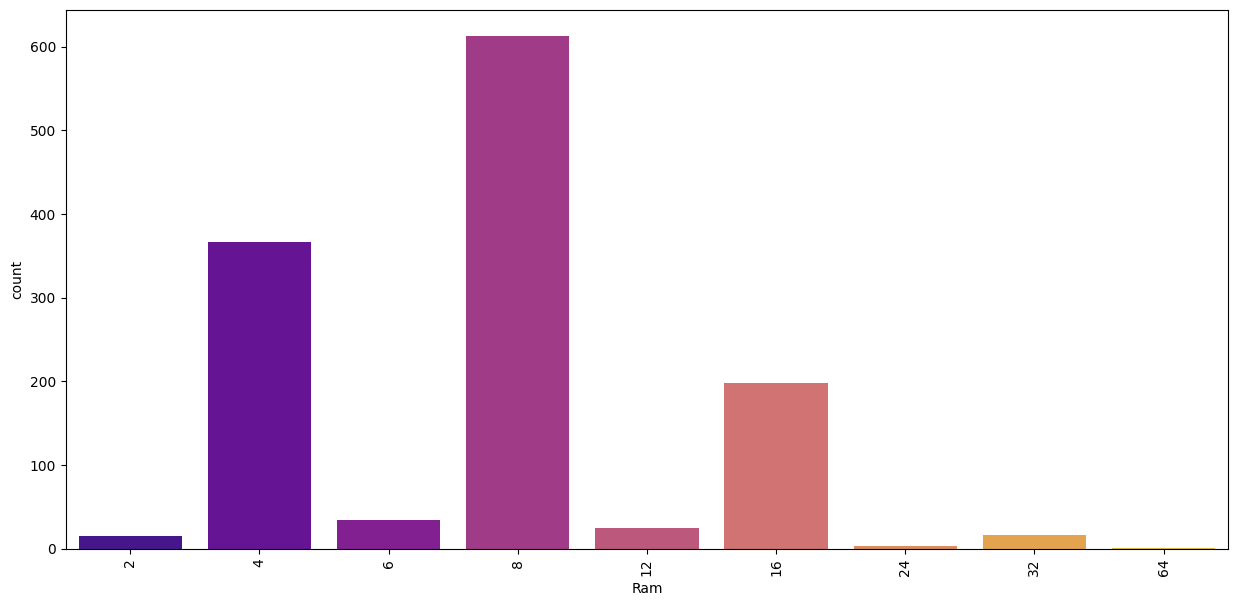

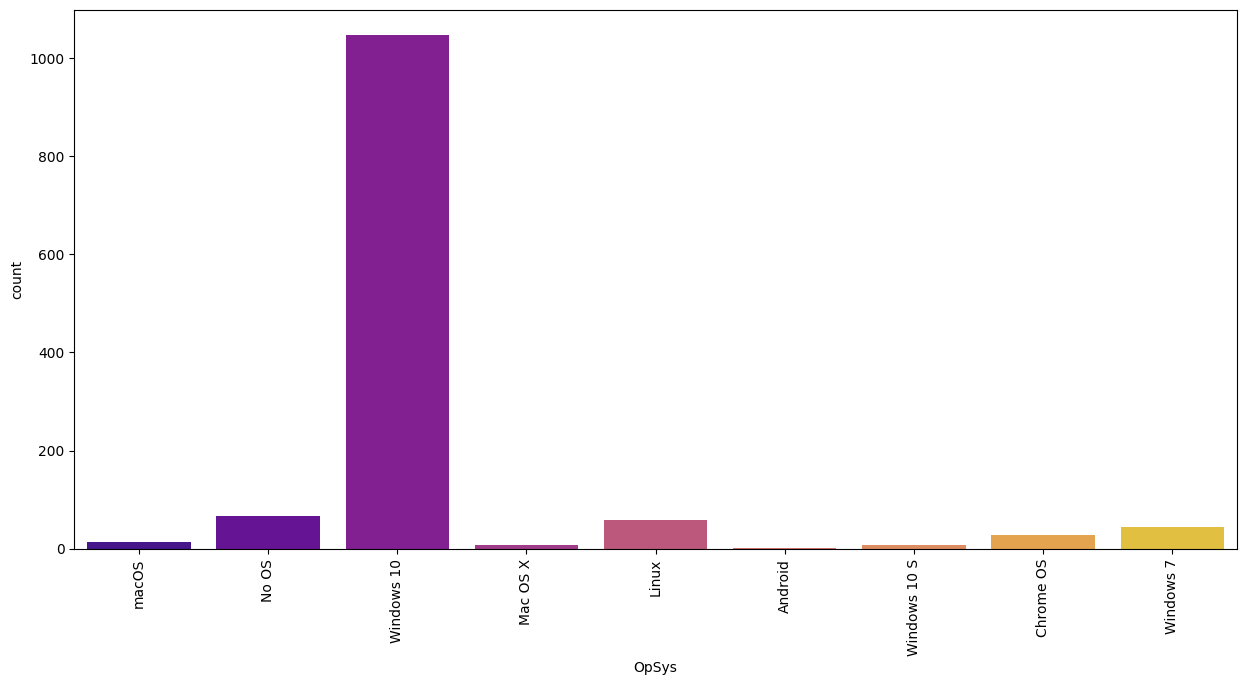

In [18]:
# ## plotting countplots for the categorical variables

def drawplot(data,col):
    plt.figure(figsize=(15,7))
    sns.countplot(x=data[col],palette='plasma')
    plt.xticks(rotation='vertical')
    
columns = ['Company', 'TypeName','Ram','OpSys']
for col in columns:
    drawplot(data,col)


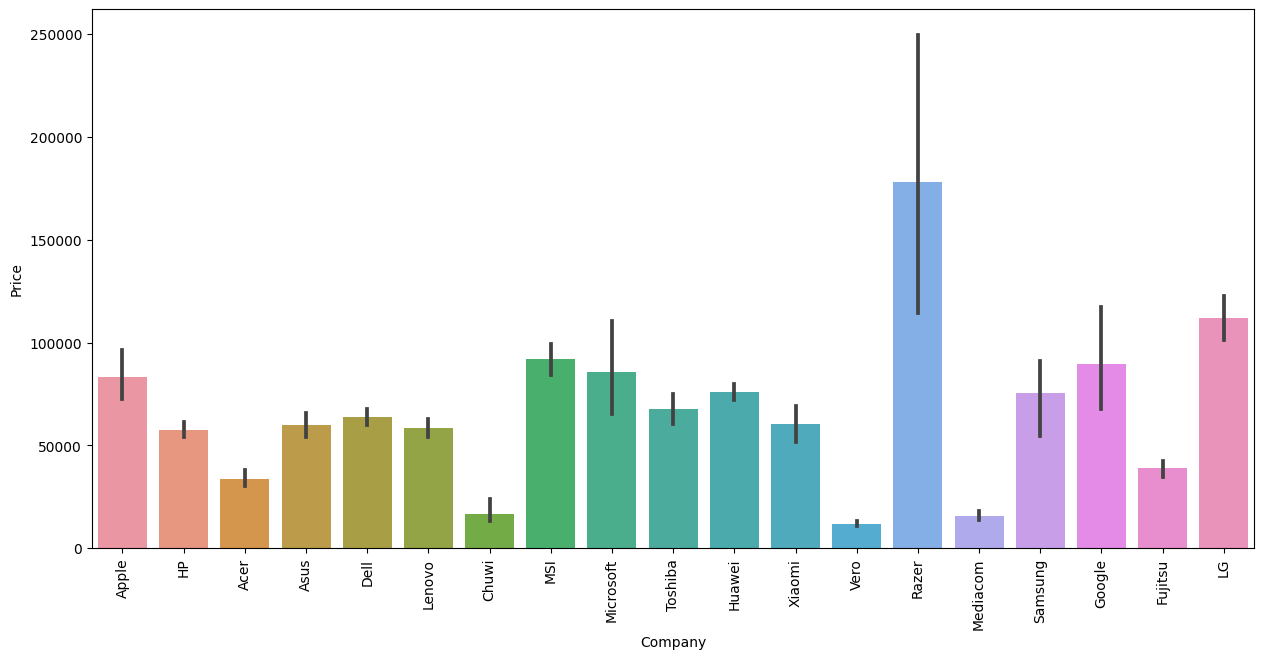

In [19]:
# average price for each of the laptop brands
# this will say us the insight that as per company the price of the laptop vary

plt.figure(figsize=(15,7))
sns.barplot(x = data['Company'],y = data['Price'])  # To remove vertical lines we can use ,ci=None
plt.xticks(rotation = 'vertical')
plt.show()



In [20]:
#### So By this barplot we see that the Razer company laptops are quite expensive compared to other companies laptop.

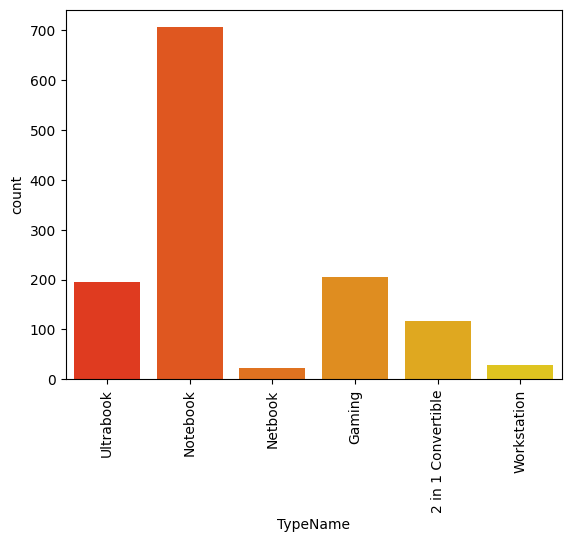

In [21]:
## various types of laptops

sns.countplot(x=data['TypeName'],palette='autumn')
plt.xticks(rotation = 'vertical')
plt.show()

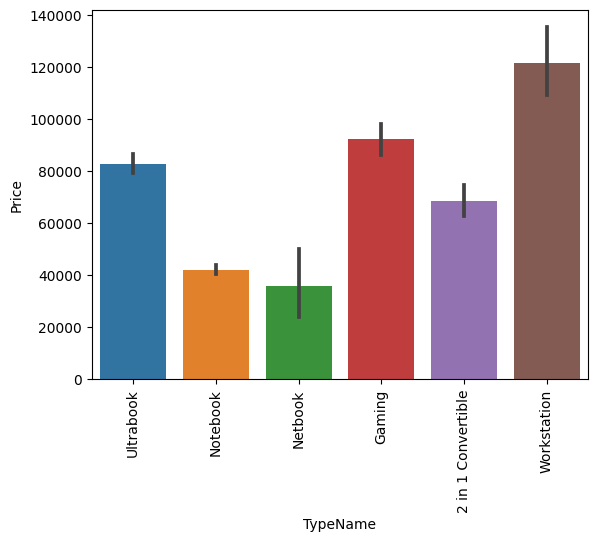

In [22]:
# laptop type and variation about the price 

sns.barplot(x = data['TypeName'],y = data['Price'])
plt.xticks(rotation = 'vertical')
plt.show()


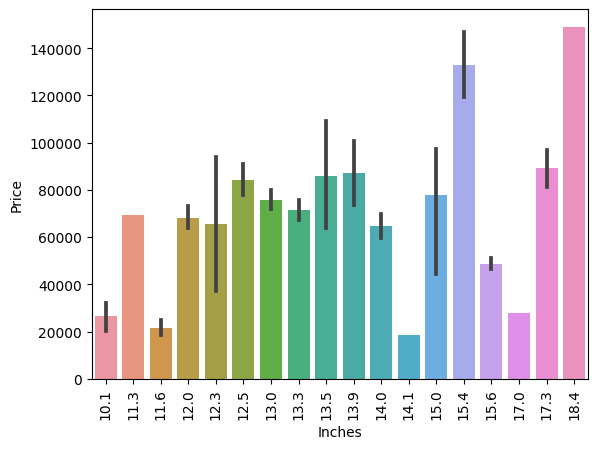

In [23]:
# variation of inches towards the price

sns.barplot(x = data['Inches'],y = data['Price'])
plt.xticks(rotation= 'vertical')
plt.show()

**For the `Screen Resolution` column we have many types of Screen Resolutions out there as shown `Touch Screen` and `Normal` and `IPS Panel` are the 3 parts on basis of which we can segregate the things**

In [24]:
data['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                505
1366x768                                         262
IPS Panel Full HD 1920x1080                      226
IPS Panel Full HD / Touchscreen 1920x1080         51
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440                    5
IPS Panel Quad HD+ / Touchscr

In [25]:
# creating a new column,touchscreen if the value is 1 that laptop is touch screen

data['TouchScreen']=data['ScreenResolution'].apply(lambda object: 1 if 'Touchscreen' in object else 0)
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0


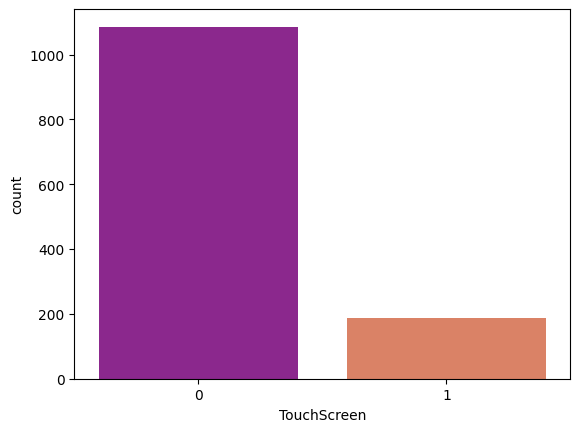

In [26]:
sns.countplot(x=data['TouchScreen'],palette='plasma')
plt.show()

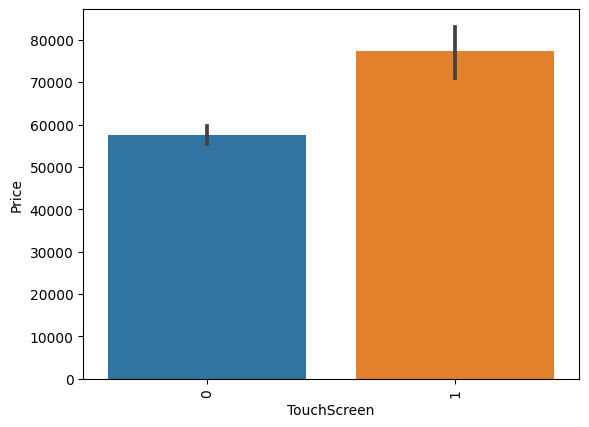

In [27]:
# touch screen on comparision with price of laptop

sns.barplot(x = data['TouchScreen'],y = data['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

### Here we can conclude that the laptop which has touchscreen is more expansive in comparision the laptop which is not touchscreen

In [28]:
# creating a new col named IPS,does the laptop have IPS facility or not

data['IPS'] = data['ScreenResolution'].apply(
    lambda element:1 if "IPS" in element else 0
)
data.head(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1


<Axes: xlabel='IPS', ylabel='count'>

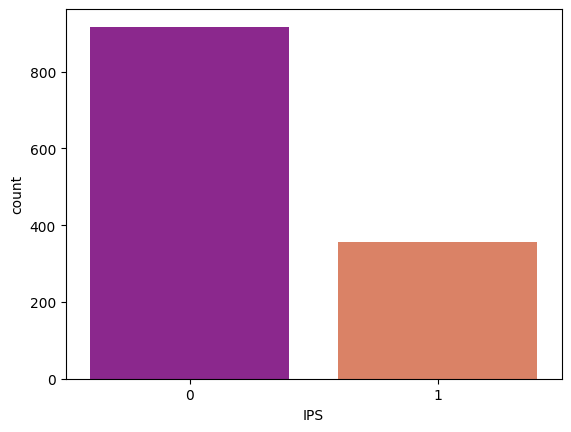

In [29]:
sns.countplot(x=data['IPS'],palette='plasma')

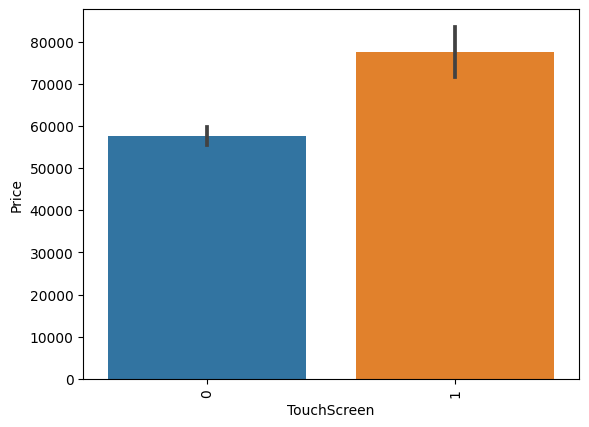

In [30]:
# price variation with respect to the IPS column

sns.barplot(x = data['TouchScreen'],y = data['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

### Extracting the X Resolution and the Y Resolution

In [31]:
# we will split the text at the "x" letter and seperate the 2 parts
# from this we can observe that one of the col is Y res we need to do
# some feature engineering on the X res col

splitdata = data['ScreenResolution'].str.split('x',n = 1,expand=True)
splitdata.head()

,0,1
0,IPS Panel Retina Display 2560,1600
1,1440,900
2,Full HD 1920,1080
3,IPS Panel Retina Display 2880,1800
4,IPS Panel Retina Display 2560,1600


In [32]:
# splitdata = data['ScreenResolution'].str.split('x',n = 1,expand=True)

data['X_resolution'] = splitdata[0]
data['Y_resolution'] = splitdata[1]
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,X_resolution,Y_resolution
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,Full HD 1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,IPS Panel Retina Display 2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,IPS Panel Retina Display 2560,1600


In [33]:
data['X_resolution'] = data['X_resolution'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,X_resolution,Y_resolution
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


In [34]:
data['X_resolution'] = data['X_resolution'].astype('int')
data['Y_resolution'] = data['Y_resolution'].astype('int')
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1274 entries, 0 to 1273
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1274 non-null   object 
 1   TypeName          1274 non-null   object 
 2   Inches            1274 non-null   float64
 3   ScreenResolution  1274 non-null   object 
 4   Cpu               1274 non-null   object 
 5   Ram               1274 non-null   int32  
 6   Memory            1274 non-null   object 
 7   Gpu               1274 non-null   object 
 8   OpSys             1274 non-null   object 
 9   Weight            1274 non-null   float32
 10  Price             1274 non-null   float64
 11  TouchScreen       1274 non-null   int64  
 12  IPS               1274 non-null   int64  
 13  X_resolution      1274 non-null   int32  
 14  Y_resolution      1274 non-null   int32  
dtypes: float32(1), float64(2), int32(3), int64(2), object(7)
memory usage: 139.3+ KB


In [35]:
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,X_resolution,Y_resolution
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


In [36]:
cat_vars = data.select_dtypes(include=['object']).columns
num_vars = data.select_dtypes(include = ['int32','int64','float32','float64']).columns

cat_vars,num_vars

(Index(['Company', 'TypeName', 'ScreenResolution', 'Cpu', 'Memory', 'Gpu',
        'OpSys'],
       dtype='object'),
 Index(['Inches', 'Ram', 'Weight', 'Price', 'TouchScreen', 'IPS',
        'X_resolution', 'Y_resolution'],
       dtype='object'))

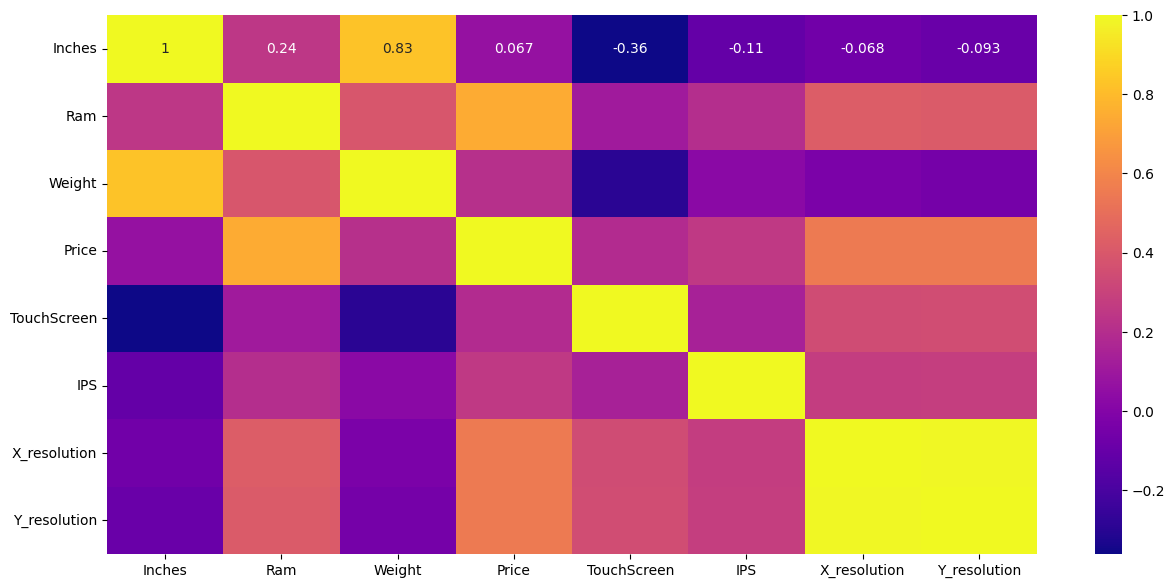

In [37]:
new_data=data.loc[:,num_vars]

plt.figure(figsize=(15,7))
sns.heatmap(data=new_data.corr(),annot=True,cmap='plasma')
plt.show()

In [38]:
new_data.corr()['Price']

Inches          0.066990
Ram             0.740106
Weight          0.212192
Price           1.000000
TouchScreen     0.188631
IPS             0.250358
X_resolution    0.552074
Y_resolution    0.548111
Name: Price, dtype: float64

In [39]:
#Here PPI stands for "Pixels Per Inch"
new_data['PPI'] = (((new_data['X_resolution']**2+new_data['Y_resolution']**2))**0.5/new_data['Inches']).astype('float')
new_data.head()

,Inches,Ram,Weight,Price,TouchScreen,IPS,X_resolution,Y_resolution,PPI
0,13.3,8,1.37,71378.6832,0,1,2560,1600,226.983005
1,13.3,8,1.34,47895.5232,0,0,1440,900,127.677940
2,15.6,8,1.86,30636.0000,0,0,1920,1080,141.211998
3,15.4,16,1.83,135195.3360,0,1,2880,1800,220.534624
4,13.3,8,1.37,96095.8080,0,1,2560,1600,226.983005


In [40]:
new_data.corr()['Price']

Inches          0.066990
Ram             0.740106
Weight          0.212192
Price           1.000000
TouchScreen     0.188631
IPS             0.250358
X_resolution    0.552074
Y_resolution    0.548111
PPI             0.469539
Name: Price, dtype: float64

**So as we observe from the correlation data that the `PPI` is having good correlation,so we will be using that,as that is a combination of 3 features and that gives collective results of 3 columns,so we will drop `Inches,X_res,Y_res` as well**

In [41]:
new_data['PPI']

0       226.983005
1       127.677940
2       141.211998
3       220.534624
4       226.983005
           ...    
1269    100.454670
1270    157.350512
1271    276.053530
1272    111.935204
1273    100.454670
Name: PPI, Length: 1274, dtype: float64

In [42]:
data['PPI']=new_data['PPI']

In [43]:
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,X_resolution,Y_resolution,PPI
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534624
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983005


In [44]:
data.drop(columns=['ScreenResolution','Inches','X_resolution','Y_resolution'],axis=1,inplace=True)
print(data.head())

  Company   TypeName                         Cpu  Ram               Memory   
0   Apple  Ultrabook        Intel Core i5 2.3GHz    8            128GB SSD  \
1   Apple  Ultrabook        Intel Core i5 1.8GHz    8  128GB Flash Storage   
2      HP   Notebook  Intel Core i5 7200U 2.5GHz    8            256GB SSD   
3   Apple  Ultrabook        Intel Core i7 2.7GHz   16            512GB SSD   
4   Apple  Ultrabook        Intel Core i5 3.1GHz    8            256GB SSD   

                            Gpu  OpSys  Weight        Price  TouchScreen  IPS   
0  Intel Iris Plus Graphics 640  macOS    1.37   71378.6832            0    1  \
1        Intel HD Graphics 6000  macOS    1.34   47895.5232            0    0   
2         Intel HD Graphics 620  No OS    1.86   30636.0000            0    0   
3            AMD Radeon Pro 455  macOS    1.83  135195.3360            0    1   
4  Intel Iris Plus Graphics 650  macOS    1.37   96095.8080            0    1   

          PPI  
0  226.983005  
1  127.67794

**Now we will work on `CPU` column,as that also has much text data and we need to process it efficiently as we may get good insights from them**

In [45]:
data['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz     190
Intel Core i7 7700HQ 2.8GHz    146
Intel Core i7 7500U 2.7GHz     132
Intel Core i7 8550U 1.8GHz      73
Intel Core i5 8250U 1.6GHz      72
                              ... 
Intel Core M M3-6Y30 0.9GHz      1
AMD A9-Series 9420 2.9GHz        1
Intel Core i5 2.9GHz             1
AMD A6-Series 7310 2GHz          1
AMD A9-Series 9410 2.9GHz        1
Name: count, Length: 118, dtype: int64

In [46]:
data['CPU_name'] = data['Cpu'].apply(lambda text:" ".join(text.split()[:3]))
data.head()


,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


In [47]:
 

def processortype(text):
    
    if text=='Intel Core i7' or text=='Intel Core i5' or text=='Intel Core i3':
        return text
    
    else:
        if text.split()[0]=='Intel':
            return 'Other Intel Processor'
        
        else:
            return 'AMD Processor'
        
    
    
data['CPU_name'] = data['CPU_name'].apply(lambda text:processortype(text))
data.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


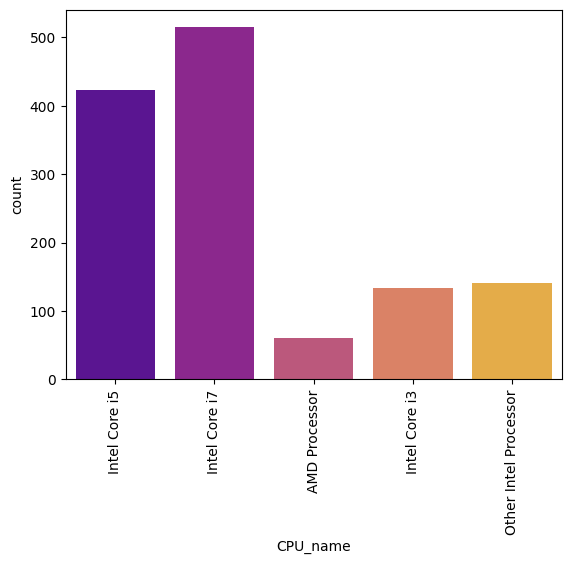

In [48]:
sns.countplot(x=data['CPU_name'],palette='plasma')
plt.xticks(rotation = 'vertical')
plt.show()

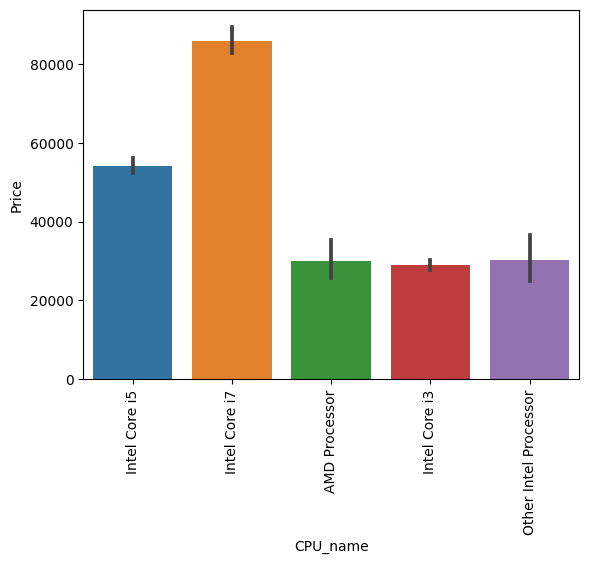

In [49]:
# price vs processor variation

sns.barplot(x=data['CPU_name'],y=data['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

#### So here we can say that the laptop which has Intel Core i7 processor will be much expansive rather than others

In [50]:
## dropping the cpu column

data.drop(columns=['Cpu'],inplace=True)
data.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


##### Analysis on the RAM column

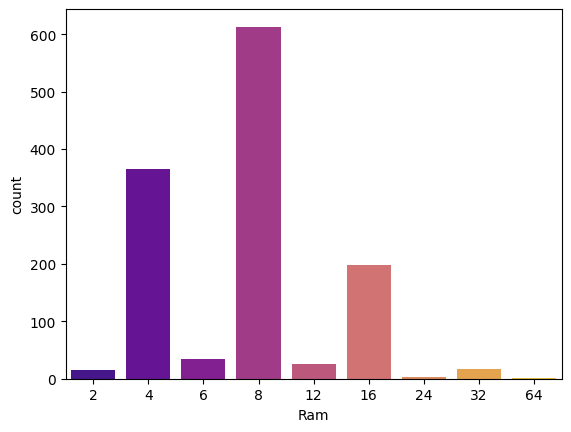

In [51]:
sns.countplot(x=data['Ram'],palette='plasma')
plt.show()

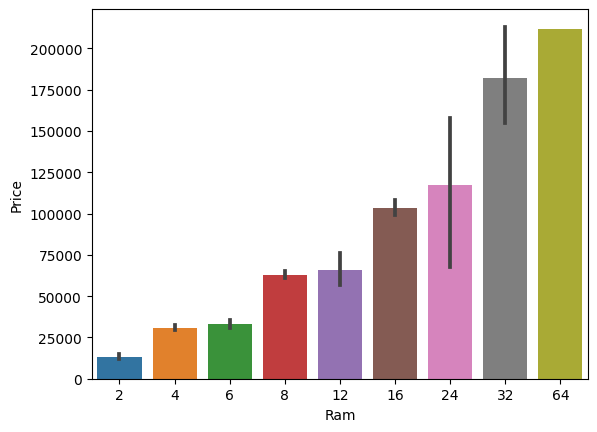

In [52]:
sns.barplot(x=data['Ram'],y=data['Price'])
plt.show()

#### So here we see that Ram is having good relation with price

In [53]:
data

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5
...,...,...,...,...,...,...,...,...,...,...,...,...
1269,Asus,Notebook,4,500GB HDD,Nvidia GeForce 920M,Windows 10,2.20,38378.6496,0,0,100.454670,Intel Core i7
1270,Lenovo,2 in 1 Convertible,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400,1,1,157.350512,Intel Core i7
1271,Lenovo,2 in 1 Convertible,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200,1,1,276.053530,Intel Core i7
1272,Lenovo,Notebook,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200,0,0,111.935204,Other Intel Processor


In [54]:
data['Memory'] = data['Memory'].apply(lambda text: text.split()[0])
data['Memory'] = data['Memory'].str.replace('GB','')
data['Memory'] = data['Memory'].str.replace('TB','')
data['Memory'] = data['Memory'].astype('float32')
data['Memory']

0       128.0
1       128.0
2       256.0
3       512.0
4       256.0
        ...  
1269    500.0
1270    128.0
1271    512.0
1272     64.0
1273      1.0
Name: Memory, Length: 1274, dtype: float32

In [55]:
new_data=data.corr(numeric_only=True)
new_data
# sns.heatmap(new_data , annot = True,cmap ='plasma')
# plt.show()

,Ram,Memory,Weight,Price,TouchScreen,IPS,PPI
Ram,1.000000,0.188512,0.389658,0.740106,0.111378,0.201446,0.292964
Memory,0.188512,1.000000,-0.105877,0.307394,0.091462,0.068218,0.176735
Weight,0.389658,-0.105877,1.000000,0.212192,-0.293933,0.022250,-0.320885
Price,0.740106,0.307394,0.212192,1.000000,0.188631,0.250358,0.469539
TouchScreen,0.111378,0.091462,-0.293933,0.188631,1.000000,0.139550,0.454189
IPS,0.201446,0.068218,0.022250,0.250358,0.139550,1.000000,0.290634
PPI,0.292964,0.176735,-0.320885,0.469539,0.454189,0.290634,1.000000


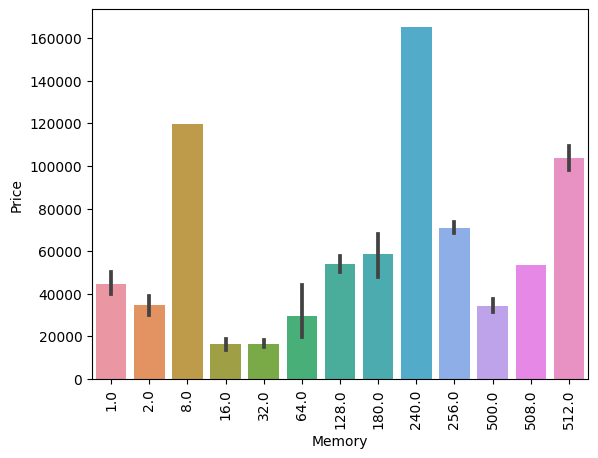

In [56]:
sns.barplot(x=data['Memory'], y = data['Price'])
plt.xticks(rotation= 'vertical')
plt.show()

In [57]:
data.drop('Memory',axis=1,inplace=True)
data.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


##### Analysis on GPU

In [58]:
data['Gpu'].value_counts()

Gpu
Intel HD Graphics 620      279
Intel HD Graphics 520      181
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

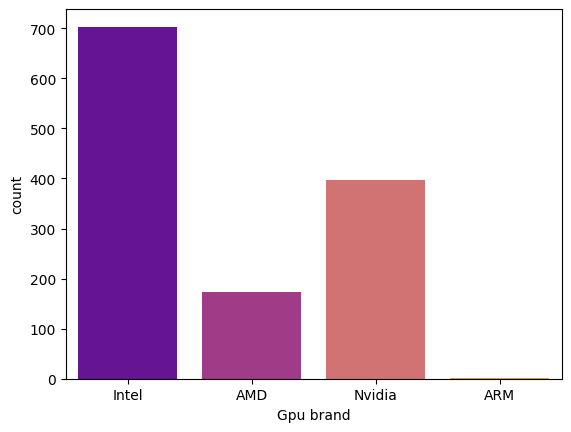

In [59]:
# this is what we will be doing,extracting the brands 
data['Gpu brand'] = data['Gpu'].apply(lambda x:x.split()[0])
sns.countplot(x=data['Gpu brand'],palette='plasma')
plt.show()

<Axes: xlabel='Gpu brand', ylabel='count'>

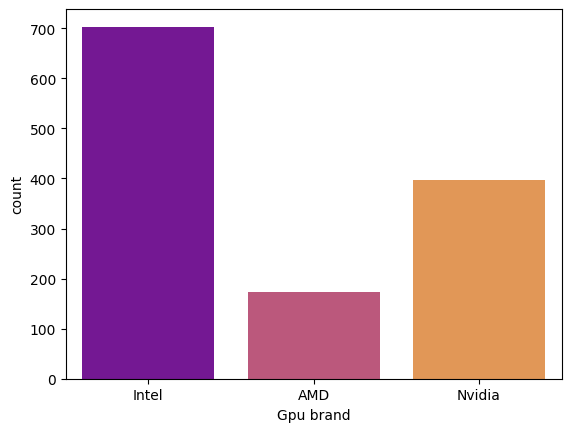

In [60]:
# removing the "ARM" tuple

data = data[data['Gpu brand']!='ARM']
sns.countplot(x=data['Gpu brand'],palette='plasma')

<Axes: xlabel='Gpu brand', ylabel='Price'>

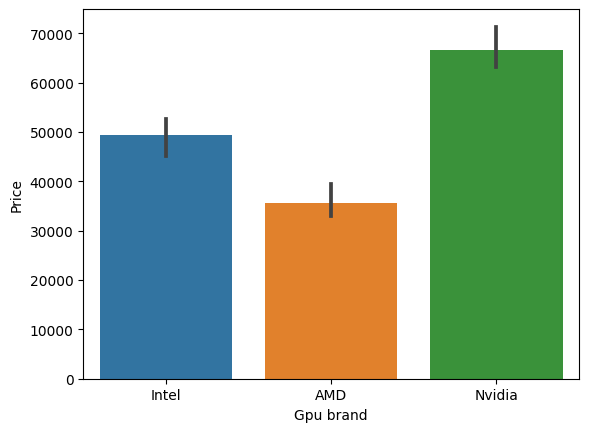

In [61]:
# price-GPU analysis,i used np.median inorder to check if there is any
# impact of outlier or not

sns.barplot(x=data['Gpu brand'],y=data['Price'],estimator=np.median)

In [62]:
data = data.drop(columns=['Gpu'])
data.head()

,Company,TypeName,Ram,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name,Gpu brand
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,Intel
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,Intel
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,Intel
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,AMD
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,Intel


##### Operating System analysis

In [63]:
data['OpSys'].value_counts()

OpSys
Windows 10      1047
No OS             66
Linux             58
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

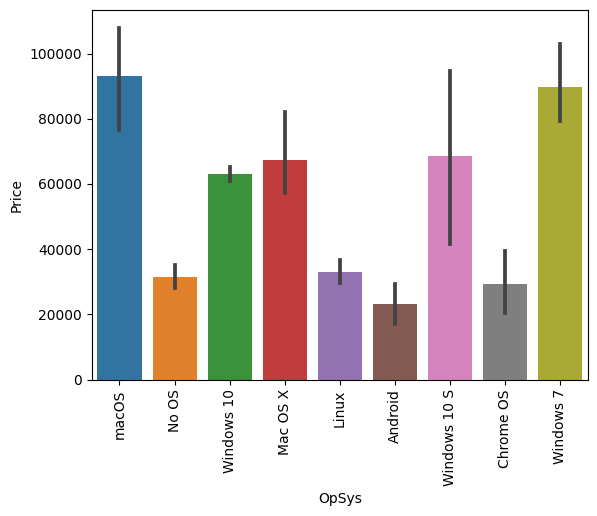

In [64]:
sns.barplot(x=data['OpSys'],y=data['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

In [65]:
data['OpSys'].unique()

array(['macOS', 'No OS', 'Windows 10', 'Mac OS X', 'Linux', 'Android',
       'Windows 10 S', 'Chrome OS', 'Windows 7'], dtype=object)

In [66]:
# club {Windows 10,Windows 7,Windows 7 S}-->Windows
# club {macOS,mac OS X}--> mac
# else return Others

def setcategory(text):
    
    if text=='Windows 10' or text=='Windows 7' or text=='Windows 10 S':
        return 'Windows'
    
    elif text=='Mac OS X' or text=='macOS':
        return 'Mac'
    
    else:
        return 'Other'
    
    
data['OpSys'] = data['OpSys'].apply(lambda x:setcategory(x))

data.head()

,Company,TypeName,Ram,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name,Gpu brand
0,Apple,Ultrabook,8,Mac,1.37,71378.6832,0,1,226.983005,Intel Core i5,Intel
1,Apple,Ultrabook,8,Mac,1.34,47895.5232,0,0,127.677940,Intel Core i5,Intel
2,HP,Notebook,8,Other,1.86,30636.0000,0,0,141.211998,Intel Core i5,Intel
3,Apple,Ultrabook,16,Mac,1.83,135195.3360,0,1,220.534624,Intel Core i7,AMD
4,Apple,Ultrabook,8,Mac,1.37,96095.8080,0,1,226.983005,Intel Core i5,Intel


In [67]:
data.sample(5)

,Company,TypeName,Ram,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name,Gpu brand
122,Lenovo,Notebook,8,Other,2.20,33513.1200,0,0,141.211998,Intel Core i5,Nvidia
798,Lenovo,2 in 1 Convertible,8,Windows,1.38,71874.7200,1,1,158.482530,Intel Core i7,Intel
978,HP,Notebook,6,Windows,2.04,30849.1200,0,0,100.454670,Intel Core i7,Intel
477,Lenovo,Notebook,8,Windows,1.70,72673.9200,0,0,157.350512,Intel Core i5,Intel
583,Dell,Notebook,16,Windows,1.93,81912.1392,0,0,141.211998,Intel Core i7,Nvidia


<Axes: xlabel='OpSys', ylabel='count'>

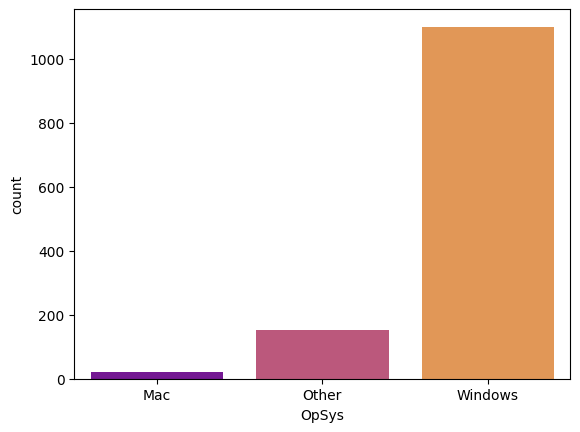

In [68]:
sns.countplot(x=data['OpSys'],palette='plasma')

(array([0, 1, 2]),
 [Text(0, 0, 'Mac'), Text(1, 0, 'Other'), Text(2, 0, 'Windows')])

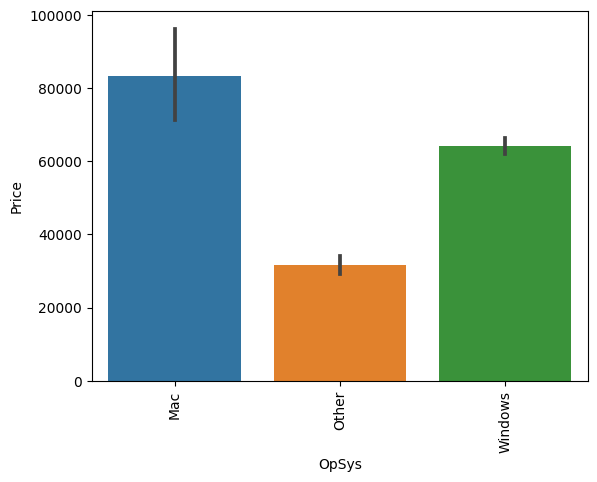

In [69]:
sns.barplot(x = data['OpSys'],y = data['Price'])
plt.xticks(rotation = 'vertical')

###### Weight analysis 

<Axes: xlabel='Weight', ylabel='Density'>

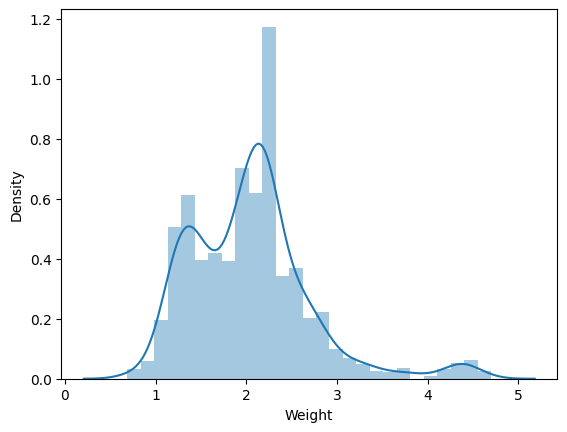

In [70]:
sns.distplot(data['Weight'])

<Axes: xlabel='Weight', ylabel='Price'>

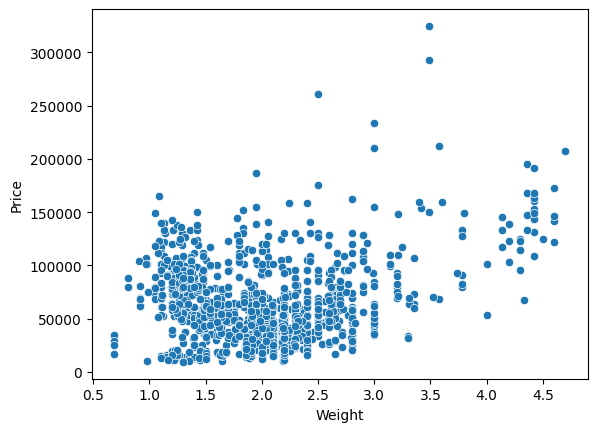

In [71]:
sns.scatterplot(x=data['Weight'],y=data['Price'])

##### Price Analysis

<Axes: xlabel='Price', ylabel='Density'>

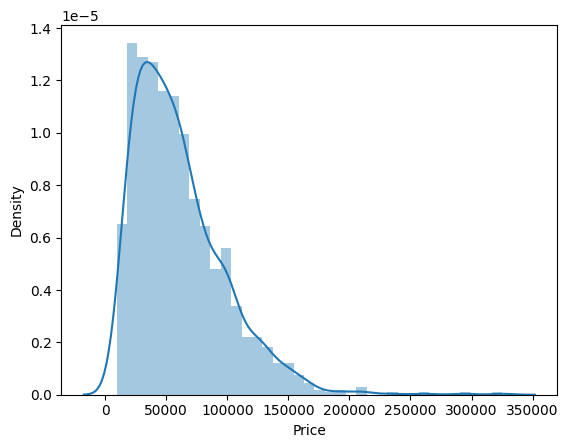

In [72]:
sns.distplot(data['Price'])

<Axes: xlabel='Price', ylabel='Density'>

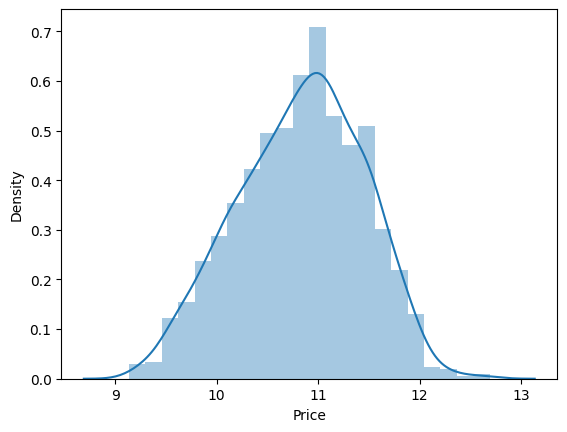

In [73]:
# so if we apply np.log to the Price col we get a gaussian distibution

sns.distplot(np.log(data['Price']))

In [74]:
## correlation with price

data.corr(numeric_only=True)['Price']

Ram            0.739996
Weight         0.211667
Price          1.000000
TouchScreen    0.190382
IPS            0.251514
PPI            0.471481
Name: Price, dtype: float64

<Axes: >

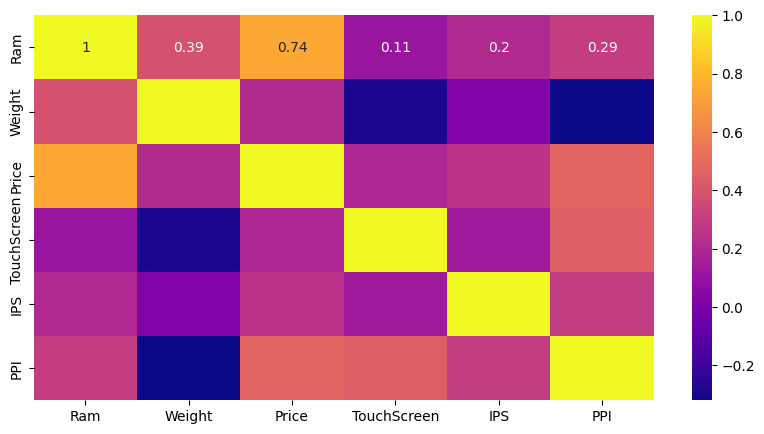

In [75]:
plt.figure(figsize=(10,5))
sns.heatmap(data.corr( numeric_only=True),annot=True,cmap='plasma')

## Model Building

In [76]:
y = np.log(data['Price'])
X = data.drop(['Price'],axis = 1)
X

,Company,TypeName,Ram,OpSys,Weight,TouchScreen,IPS,PPI,CPU_name,Gpu brand
0,Apple,Ultrabook,8,Mac,1.37,0,1,226.983005,Intel Core i5,Intel
1,Apple,Ultrabook,8,Mac,1.34,0,0,127.677940,Intel Core i5,Intel
2,HP,Notebook,8,Other,1.86,0,0,141.211998,Intel Core i5,Intel
3,Apple,Ultrabook,16,Mac,1.83,0,1,220.534624,Intel Core i7,AMD
4,Apple,Ultrabook,8,Mac,1.37,0,1,226.983005,Intel Core i5,Intel
...,...,...,...,...,...,...,...,...,...,...
1269,Asus,Notebook,4,Windows,2.20,0,0,100.454670,Intel Core i7,Nvidia
1270,Lenovo,2 in 1 Convertible,4,Windows,1.80,1,1,157.350512,Intel Core i7,Intel
1271,Lenovo,2 in 1 Convertible,16,Windows,1.30,1,1,276.053530,Intel Core i7,Intel
1272,Lenovo,Notebook,2,Windows,1.50,0,0,111.935204,Other Intel Processor,Intel


In [84]:
# !pip install xgboost

In [104]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn import tree

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   test_size=0.15,random_state=2)

X_train.shape,X_test.shape

((1082, 10), (191, 10))

In [80]:
X_train.columns

Index(['Company', 'TypeName', 'Ram', 'OpSys', 'Weight', 'TouchScreen', 'IPS',
       'PPI', 'CPU_name', 'Gpu brand'],
      dtype='object')

**There's a Class which we imported named as `Column Trasnformer` we use this widely while building our models using `Pipelines`,so for this we have to get the index numbers of the columns which are having categorical variables**

In [81]:
mapper = {i:value for i,value in enumerate(X_train.columns)}
mapper

{0: 'Company',
 1: 'TypeName',
 2: 'Ram',
 3: 'OpSys',
 4: 'Weight',
 5: 'TouchScreen',
 6: 'IPS',
 7: 'PPI',
 8: 'CPU_name',
 9: 'Gpu brand'}

In [82]:
X_train

,Company,TypeName,Ram,OpSys,Weight,TouchScreen,IPS,PPI,CPU_name,Gpu brand
716,Dell,Notebook,8,Windows,1.90,0,0,141.211998,Intel Core i5,Intel
21,Lenovo,Gaming,8,Windows,2.50,0,1,141.211998,Intel Core i5,Nvidia
968,Dell,Gaming,32,Windows,4.42,0,1,127.335675,Intel Core i7,Nvidia
273,Lenovo,2 in 1 Convertible,16,Windows,1.36,1,0,209.800683,Intel Core i7,Intel
1234,Apple,Ultrabook,4,Mac,1.08,0,0,135.094211,Intel Core i5,Intel
...,...,...,...,...,...,...,...,...,...,...
466,Acer,Notebook,4,Windows,2.20,0,0,100.454670,Intel Core i3,Nvidia
299,Asus,Ultrabook,16,Windows,1.63,0,0,141.211998,Intel Core i7,Nvidia
493,Acer,Notebook,8,Windows,2.20,0,0,100.454670,AMD Processor,AMD
527,Lenovo,Notebook,8,Other,2.20,0,0,100.454670,Intel Core i3,Nvidia


### Linear Regression

In [83]:
 

ct = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,8,9])
],remainder='passthrough')
LR = LinearRegression()

pipe = Pipeline([
    ('ct',ct),
    ('LR',LR)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',metrics.r2_score(y_test,y_pred))
print('MAE',metrics.mean_absolute_error(y_test,y_pred))

R2 score 0.7510032336387074
MAE 0.23478456140993254


In [85]:
##  mae is 0.23 so if you want to check how much difference is there do this

##  there is a difference of 1.25 only as per the orignal value
##  model predicts +-0.23 more/less than the original price!

np.exp(0.23)

1.2586000099294778

### Ridge Regression

In [86]:
# we will apply one hot encoding on the columns with this indices-->[0,1,3,8,9]
# the remainder we keep as passthrough i.e no other col must get effected 
# except the ones undergoing the transformation!

ct1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,8,9])
],remainder='passthrough')

ridge = Ridge(alpha=0.0010)

pipe = Pipeline([
    ('ct1',ct1),
    ('ridge',ridge)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',metrics.r2_score(y_test,y_pred))
print('MAE',metrics.mean_absolute_error(y_test,y_pred))

R2 score 0.7510152901202294
MAE 0.23478051055329802


### LassoRegression

In [87]:
#  apply one hot encoding on the columns with this indices-->[0,1,3,8,9]
# the remainder we keep as passthrough i.e no other col must get effected 
# except the ones undergoing the transformation!

ct2 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,8,9])
],remainder='passthrough')

lasso = Lasso(alpha=0.001)

pipe = Pipeline([
    ('ct2',ct2),
    ('lasso',lasso)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',metrics.r2_score(y_test,y_pred))
print('MAE',metrics.mean_absolute_error(y_test,y_pred))

R2 score 0.7612068700601756
MAE 0.2323828469197241


### Decision Tree

In [88]:
ct3 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,8,9])
],remainder='passthrough')

DTR = DecisionTreeRegressor(max_depth=8)

pipe = Pipeline([
    ('ct3',ct3),
    ('DTR',DTR)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',metrics.r2_score(y_test,y_pred))
print('MAE',metrics.mean_absolute_error(y_test,y_pred))

R2 score 0.7723533724136447
MAE 0.22039975739672993


### Random Forest

In [89]:
ct4 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,8,9])
],remainder='passthrough')

RFR = RandomForestRegressor(n_estimators=100,
                            criterion="squared_error",
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('ct4',ct4),
    ('RFR',RFR)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',metrics.r2_score(y_test,y_pred))
print('MAE',metrics.mean_absolute_error(y_test,y_pred))

R2 score 0.83238448252892
MAE 0.18954607025295805


In [90]:
# import pickle

# pickle.dump(df,open('df.pkl','wb'))
# pickle.dump(pipe,open('pipe.pkl','wb'))

In [91]:
# train.to_csv('traineddata.csv',index=None)

## Hyperparameter Tuning for Random Forest 

In [92]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 10)]
# Number of features to consider at every split
max_features = ['sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 30,5)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8,10]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['squared_error','absolute_error']}
print(random_grid)

{'n_estimators': [100, 222, 344, 466, 588, 711, 833, 955, 1077, 1200], 'max_features': ['sqrt', 'log2'], 'max_depth': [1, 8, 15, 22, 30], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8, 10], 'criterion': ['squared_error', 'absolute_error']}


## RandomizedSearchCV

In [93]:
ct4 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,8,9])
],remainder='passthrough')


In [94]:
rf=RandomForestRegressor()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=10,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
ct5 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,8,9])
],remainder='passthrough')

pipe = Pipeline([
    ('ct5',ct5),
    ('brg',rf_randomcv)
])

### fit the randomized model
pipe.fit(X_train,y_train)
# rf_randomcv.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


Pipeline(steps=[('ct5',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col_tnf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  [0, 1, 3, 8, 9])])),
                ('brg',
                 RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(),
                                    n_jobs=-1,
                                    param_distributions={'criterion': ['squared_error',
                                                                       'absolute_error'],
                                                         'max_depth': [1, 8, 15,
                                                                       22, 30],
                                                         'max_features': ['sqrt',
                                                                          'log2'],
                                                         'min_samples_leaf': [1,
                                                                              2,
                                                                              4,
                                                                              6,
                                                                              8,
                                                                              10],
                                                         'min_samples_split': [2,
                                                                               5,
                                                                               10,
                                                                               14],
                                                         'n_estimators': [100,
                                                                          222,
                                                                          344,
                                                                          466,
                                                                          588,
                                                                          711,
                                                                          833,
                                                                          955,
                                                                          1077,
                                                                          1200]},
                                    random_state=100, verbose=2))])

In [95]:
rf_randomcv.best_estimator_

RandomForestRegressor(criterion='absolute_error', max_depth=30,
                      max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=5, n_estimators=833)

## Tuned hyperparameters are

 ### criterion='absolute_error', max_depth=30,max_features='sqrt', min_samples_leaf=2,min_samples_split=5, n_estimators=833)

In [96]:
best_random_grid=rf_randomcv.best_estimator_

In [98]:
ct6 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,8,9])
],remainder='passthrough')


pipe = Pipeline([
    ('ct6',ct6),
    ('brg',best_random_grid)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',metrics.r2_score(y_test,y_pred))
print('MAE',metrics.mean_absolute_error(y_test,y_pred))

R2 score 0.8471018469447755
MAE 0.18962278299193774


In [100]:
rf_randomcv.best_params_

{'n_estimators': 833,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 30,
 'criterion': 'absolute_error'}

## GridSearchCV

In [101]:
param_grid = {
    'criterion': [rf_randomcv.best_params_['criterion']],
    'max_depth': [rf_randomcv.best_params_['max_depth']],
    'max_features': [rf_randomcv.best_params_['max_features']],
    'min_samples_leaf': [rf_randomcv.best_params_['min_samples_leaf'], 
                         rf_randomcv.best_params_['min_samples_leaf']+2, 
                         rf_randomcv.best_params_['min_samples_leaf'] + 4],
    'min_samples_split': [rf_randomcv.best_params_['min_samples_split'] - 2,
                          rf_randomcv.best_params_['min_samples_split'] - 1,
                          rf_randomcv.best_params_['min_samples_split'], 
                          rf_randomcv.best_params_['min_samples_split'] +1,
                          rf_randomcv.best_params_['min_samples_split'] + 2],
    'n_estimators': [rf_randomcv.best_params_['n_estimators'] - 200, rf_randomcv.best_params_['n_estimators'] - 100, 
                     rf_randomcv.best_params_['n_estimators'], 
                     rf_randomcv.best_params_['n_estimators'] + 100, rf_randomcv.best_params_['n_estimators'] + 200]
}

print(param_grid)

{'criterion': ['absolute_error'], 'max_depth': [30], 'max_features': ['sqrt'], 'min_samples_leaf': [2, 4, 6], 'min_samples_split': [3, 4, 5, 6, 7], 'n_estimators': [633, 733, 833, 933, 1033]}


In [107]:
rf=RandomForestRegressor()
grid_search=GridSearchCV(estimator=rf,param_grid=param_grid,cv=3,n_jobs=-1,verbose=2)


ct7 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,8,9])
],remainder='passthrough')

pipe = Pipeline([
    ('ct7',ct7),
    ('gs',grid_search)
])


pipe.fit(X_train,y_train)


Fitting 3 folds for each of 75 candidates, totalling 225 fits


Pipeline(steps=[('ct7',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col_tnf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  [0, 1, 3, 8, 9])])),
                ('gs',
                 GridSearchCV(cv=3, estimator=RandomForestRegressor(),
                              n_jobs=-1,
                              param_grid={'criterion': ['absolute_error'],
                                          'max_depth': [30],
                                          'max_features': ['sqrt'],
                                          'min_samples_leaf': [2, 4, 6],
                                          'min_samples_split': [3, 4, 5, 6, 7],
                                          'n_estimators': [633, 733, 833, 933,
                                                           1033]},
                              verbose=2))])

In [109]:
grid_search.best_estimator_

RandomForestRegressor(criterion='absolute_error', max_depth=30,
                      max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=3, n_estimators=1033)

In [110]:
best_grid_search=grid_search.best_estimator_

In [112]:
ct8 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,8,9])
],remainder='passthrough')


pipe = Pipeline([
    ('ct8',ct8),
    ('bgs',best_grid_search)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',metrics.r2_score(y_test,y_pred))
print('MAE',metrics.mean_absolute_error(y_test,y_pred))

R2 score 0.8459846700825253
MAE 0.19037684798506413


In [113]:
data

,Company,TypeName,Ram,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name,Gpu brand
0,Apple,Ultrabook,8,Mac,1.37,71378.6832,0,1,226.983005,Intel Core i5,Intel
1,Apple,Ultrabook,8,Mac,1.34,47895.5232,0,0,127.677940,Intel Core i5,Intel
2,HP,Notebook,8,Other,1.86,30636.0000,0,0,141.211998,Intel Core i5,Intel
3,Apple,Ultrabook,16,Mac,1.83,135195.3360,0,1,220.534624,Intel Core i7,AMD
4,Apple,Ultrabook,8,Mac,1.37,96095.8080,0,1,226.983005,Intel Core i5,Intel
...,...,...,...,...,...,...,...,...,...,...,...
1269,Asus,Notebook,4,Windows,2.20,38378.6496,0,0,100.454670,Intel Core i7,Nvidia
1270,Lenovo,2 in 1 Convertible,4,Windows,1.80,33992.6400,1,1,157.350512,Intel Core i7,Intel
1271,Lenovo,2 in 1 Convertible,16,Windows,1.30,79866.7200,1,1,276.053530,Intel Core i7,Intel
1272,Lenovo,Notebook,2,Windows,1.50,12201.1200,0,0,111.935204,Other Intel Processor,Intel


In [116]:
import pickle
pickle.dump(data, open('data_lap.pkl','wb'))
pickle.dump(pipe, open('pipe_lap.pkl','wb'))